# Question 1


### **090180344** 

### **Ezgi Özgen**

For this question use the World Bank Data for Turkey for the following indicators. Use [wbgapi]

**Linear regression method olarak eklicen yorumlamalar yapılcak ilk iki soruda anlamadım regression tam olarak içeriği girdileri ne olucak ???????**

(https://pypi.org/project/wbgapi/) for getting the data.

* [Literacy rate, adult female (SE.ADT.LITR.FE.ZS)](https://data.worldbank.org/indicator/SE.ADT.LITR.FE.ZS)
* [Labor force, female (SL.TLF.TOTL.FE.ZS)](https://data.worldbank.org/indicator/SL.TLF.TOTL.FE.ZS)
* [Poverty headcount ratio at national poverty lines (SI.POV.NAHC)](https://data.worldbank.org/indicator/SI.POV.NAHC)
* [Current health expenditure per capita (SH.XPD.CHEX.PC.CD)](https://data.worldbank.org/indicator/SH.XPD.CHEX.PC.CD)
* [GDP per capita (NY.GDP.PCAP.CD)](https://data.worldbank.org/indicator/NY.GDP.PCAP.CD)
* [Mortality rate, under-5 (SH.DYN.MORT)](https://data.worldbank.org/indicator/SH.DYN.MORT)


Using the [statsmodels](https://www.statsmodels.org/stable/index.html) library write the best linear regression model using child mortality as the dependent variable while the rest are considered as independent variables. Pay particular attention to the fact that the order of the variables put into the model significantly impacts the performance of the model. Choose the best model by considering

* with the minimum number of variables and their interactions,
* with the optimal ordering of the independent variables and their interactions,
* $R^2$-score of the model,
* statistical significance of the model coefficients,
* ANOVA analysis of the model.


I have imported the relevant libraries that I will use in the questions.

In [49]:
import wbgapi as wb   # I use wb as a namespace in all my work
import pandas as pd   # optional but highly recommended for wbgapi
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

I created a function because I will be pulling more than one word bank data. In this function, it pulls the data variable with the fetch method with the help of the wbgapi library. But, as stated at the beginning of the question, I specified the expression TUR, that is, Turkey.

In [50]:
def read_data(data):
    return pd.DataFrame(list(wb.data.fetch(data, ["TUR"])))


In [51]:
literacy_rate = read_data('SE.ADT.LITR.FE.ZS')
labor_force = read_data('SL.TLF.TOTL.FE.ZS')
poverty = read_data('SI.POV.NAHC')
current_health = read_data('SH.XPD.CHEX.PC.CD')
GDP_per = read_data('NY.GDP.PCAP.CD')
mortality_rate = read_data('SH.DYN.MORT')

I checked how my data came. to decide what I should take to build the model. When we examine it here, we need time and value columns.

In [52]:
labor_force

,value,series,economy,aggregate,time
0,32.470214,SL.TLF.TOTL.FE.ZS,TUR,False,YR2021
1,32.175606,SL.TLF.TOTL.FE.ZS,TUR,False,YR2020
2,33.360649,SL.TLF.TOTL.FE.ZS,TUR,False,YR2019
3,33.089766,SL.TLF.TOTL.FE.ZS,TUR,False,YR2018
4,32.799757,SL.TLF.TOTL.FE.ZS,TUR,False,YR2017
...,...,...,...,...,...
57,NaN,SL.TLF.TOTL.FE.ZS,TUR,False,YR1964
58,NaN,SL.TLF.TOTL.FE.ZS,TUR,False,YR1963
59,NaN,SL.TLF.TOTL.FE.ZS,TUR,False,YR1962
60,NaN,SL.TLF.TOTL.FE.ZS,TUR,False,YR1961


I adapted the function mentioned in the lecture into my own code. Since I've added a country filter at the beginning, it's enough to just pull the time and value. I applied this to my datasets, then combined the dataframes I created with the help of the concat function.
There were too many nan values, so I applied the dropna operation.

In [53]:
def extract(df,name):
    tmp = df[['time','value']]
    tmp.index = tmp.time
    del tmp['time']
    tmp.columns = [[name]]
    return tmp

lit = extract(literacy_rate,'literacy')
lab = extract(labor_force,'labor')
pov = extract(poverty,'poverty')
curr = extract(current_health,'current')
gdp = extract(GDP_per,'gdp')
mor = extract(mortality_rate,'mortality')
res=pd.concat([lit,lab,pov,curr,gdp,mor], axis=1)
res.dropna(inplace=True)

res



,literacy,labor,poverty,current,gdp,mortality
time,,,,,,
YR2019,94.424042,33.360649,15.0,396.466827,9121.515167,10.1
YR2017,93.498268,32.799757,13.9,442.617615,10589.667725,11.4
YR2016,93.563011,32.250459,13.5,466.794800,10894.603378,12.1
YR2015,92.645813,31.719798,14.3,453.116486,11006.279524,13.0
YR2014,92.401817,31.027784,14.7,525.844727,12157.990434,13.8
YR2013,92.138077,31.199391,15.0,551.401245,12614.781610,14.7
YR2012,91.604523,30.464131,15.0,524.250305,11795.633457,15.8
YR2011,90.310097,29.832127,16.3,531.418579,11420.555456,16.9
YR2010,88.073174,29.161917,16.1,539.327148,10742.774979,18.1


I created the dataframe I wanted above. In the regression part, I used the statsmodels.formula.api library and applied ols. My arguments are literacy, labor,poverty,current health, gdp as stated at the beginning. My dependent variable is mortality. I printed the OLS regression result and anova table. The R^2 score is very good, but the range of the variables gives us a better interpretation. literacy, poverty and gdp include zero in the range. Our p values are very high in these variables, that is, we cannot understand that there is no relationship or difference between these variables. The main idea behind ANOVA is to test whether there is a statistically significant difference in the measured means between subgroups of a sample. The high value argument sum_sq is important to us. literacy significance is important, then labor comes.

In [54]:
from statsmodels.formula.api import ols
model = ols('mortality ~ literacy + labor + poverty + current + gdp', data=res).fit()
print(model.summary())
sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     169.6
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           3.81e-07
Time:                        00:16:46   Log-Likelihood:                -7.8492
No. Observations:                  13   AIC:                             27.70
Df Residuals:                       7   BIC:                             31.09
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.8438      9.987      6.994      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
literacy,1.0,296.579278,296.579278,815.327082,1.661736e-08
labor,1.0,8.414644,8.414644,23.132725,1.944516e-03
poverty,1.0,0.940111,0.940111,2.584462,1.519524e-01
current,1.0,1.829951,1.829951,5.030724,5.981897e-02
gdp,1.0,0.769732,0.769732,2.116072,1.890863e-01
Residual,7.0,2.546285,0.363755,NaN,NaN


When we examined it in this section, I observed the same results with the regression result interval and R^2 output. But I observed that the sum_sq values in the anova table change with the change of the order of the arguments. I tried to find the optimal output with a few sequencing trials and observations. When I examine it, literacy is explained first, and then again, I observed that the values of variables such as labor but poverty current increase.

In [108]:
from statsmodels.formula.api import ols
model = ols('mortality ~ literacy + poverty+ labor + current + gdp', data=res).fit()
print(model.summary())
sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     169.6
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           3.81e-07
Time:                        22:29:54   Log-Likelihood:                -7.8492
No. Observations:                  13   AIC:                             27.70
Df Residuals:                       7   BIC:                             31.09
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.8438      9.987      6.994      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
literacy,1.0,296.579278,296.579278,815.327082,1.661736e-08
poverty,1.0,3.560728,3.560728,9.788810,1.663977e-02
labor,1.0,5.794026,5.794026,15.928377,5.249496e-03
current,1.0,1.829951,1.829951,5.030724,5.981897e-02
gdp,1.0,0.769732,0.769732,2.116072,1.890863e-01
Residual,7.0,2.546285,0.363755,NaN,NaN


Then I took the multiplication and ordering of the independent variables to detect interaction with each other. The R^2 value is very high, but in terms of intervals, regression is not a good option. When I examined the Anova Table, I observed that literacy and labor are of significant importance.

In [134]:
from statsmodels.formula.api import ols
model = ols('mortality ~ literacy+labor *current * gdp+poverty', data=res).fit()
print(model.summary())
sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     206.6
Date:                Thu, 03 Nov 2022   Prob (F-statistic):           0.000500
Time:                        22:44:33   Log-Likelihood:                 2.7174
No. Observations:                  13   AIC:                             14.57
Df Residuals:                       3   BIC:                             20.21
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           203.5030    223.18

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,df,sum_sq,mean_sq,F,PR(>F)
literacy,1.0,296.579278,296.579278,1775.631635,0.000029
labor,1.0,8.414644,8.414644,50.378797,0.005753
current,1.0,2.609586,2.609586,15.623690,0.028893
labor:current,1.0,1.766939,1.766939,10.578731,0.047400
gdp,1.0,0.117225,0.117225,0.701833,0.463659
labor:gdp,1.0,0.913053,0.913053,5.466481,0.101401
current:gdp,1.0,0.000978,0.000978,0.005854,0.943829
labor:current:gdp,1.0,0.132629,0.132629,0.794053,0.438526
poverty,1.0,0.044587,0.044587,0.266945,0.641062
Residual,3.0,0.501082,0.167027,NaN,NaN


Looking at the correlation matrix, I observed that there is a correlation between literacy and labor, and the correlation between mortality and labor can affect the accuracy of the model, so some columns can be extracted and tested.

In [141]:
res.corr().style.background_gradient(cmap='bone_r').set_precision(2)

<ipython-input-141-94f39f14f233>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  res.corr().style.background_gradient(cmap='bone_r').set_precision(2)


,"('literacy',)","('labor',)","('poverty',)","('current',)","('gdp',)","('mortality',)"
literacy,1.00,0.98,-0.85,0.24,0.71,-0.98
labor,0.98,1.00,-0.87,0.10,0.59,-0.99
poverty,-0.85,-0.87,1.00,-0.19,-0.64,0.89
current,0.24,0.10,-0.19,1.00,0.79,-0.17
gdp,0.71,0.59,-0.64,0.79,1.00,-0.62
mortality,-0.98,-0.99,0.89,-0.17,-0.62,1.00


# Question 2

For this question use Yahoo's Finance API for the following tickers:

* Gold futures (GC=F)
* Silver futures (SI=F)
* Copper futures (HG=F)
* Platinum futures (PL=F)

1. Write the best linear regression model that explains gold futures closing prices in terms of opening prices of gold, silver, copper, and platinum futures.
2. Repeat the same for silver, copper and platinum prices.
3. Compare the models you obtained in Steps 1 and 2. Which model is better? How do you decide? Explain.

In [29]:
import yfinance as yf

I pulled data for Gold, silver, copper and platinum in bulk with the yfinance library.

In [58]:
finance = yf.download(['GC=F','SI=F','HG=F',"PL=F"])
finance.head(2)


[*********************100%***********************]  4 of 4 completed


Adj Close                       Close       \
                               GC=F HG=F        PL=F SI=F  GC=F HG=F   
Date                                                                   
2000-01-04 00:00:00-05:00       NaN  NaN  429.700012  NaN   NaN  NaN   
2000-01-05 00:00:00-05:00       NaN  NaN  419.899994  NaN   NaN  NaN   

                                           High       ...         Low       \
                                 PL=F SI=F GC=F HG=F  ...        PL=F SI=F   
Date                                                  ...                    
2000-01-04 00:00:00-05:00  429.700012  NaN  NaN  NaN  ...  421.000000  NaN   
2000-01-05 00:00:00-05:00  419.899994  NaN  NaN  NaN  ...  416.899994  NaN   

                          Open                  Volume                   
                          GC=F HG=F   PL=F SI=F   GC=F HG=F   PL=F SI=F  
Date                                                                     
2000-01-04 00:00:00-05:00  NaN  NaN  428.0  NaN    NaN  NaN  632.0  NaN  
2000-01-05 00:00:00-05:00  NaN  NaN  428.0  NaN    NaN  NaN  571.0  NaN  

[2 rows x 24 columns]

Later, I created a function considering that the open and close columns will be used in the question. This function takes the condition parameter and the abbreviation for which trickker it belongs to. It converts the columns it has drawn into a data frame and gives output with return.

In [59]:
def takedf(condition,ticker):
    if condition=='Open':
        return finance[condition][ticker].to_frame()
    else:
        return finance[condition][ticker].to_frame()
    
    

I made the function with the open and close values of each trickker. Since I gave the resulting columns as dataframes, I later combined them with concat. I renamed the column names for clarity. The nan values were too high, so I removed the nan values with the dropna method so that it wouldn't cause any problems for the model.

In [135]:
gold =takedf('Open','GC=F')
goldcl =takedf('Close','GC=F')
sil = takedf('Open','SI=F')
silcl =takedf('Close','SI=F')
Cop =takedf('Open','HG=F')
Copcl =takedf('Close','HG=F')
Plat =takedf('Open','PL=F')
Platcl =takedf('Close','PL=F')
resfi =pd.concat([gold,sil,Cop,Plat,goldcl,silcl,Copcl,Platcl],axis=1)
resfi.columns = ['gold_open','silver_open', 'copper_open','platinum_open','gold_Close','silver_close','Copper_close','platinum_close']
resfi.dropna(inplace=True)
resfi

,gold_open,silver_open,copper_open,platinum_open,gold_Close,silver_close,Copper_close,platinum_close
Date,,,,,,,,
2000-08-30 00:00:00-04:00,273.899994,4.950000,0.8790,593.900024,273.899994,4.930000,0.8850,591.400024
2000-08-31 00:00:00-04:00,274.799988,4.920000,0.8850,589.000000,278.299988,5.003000,0.8850,586.700012
2000-09-01 00:00:00-04:00,277.000000,5.035000,0.8780,588.000000,277.000000,5.004000,0.8890,595.299988
2000-09-05 00:00:00-04:00,275.799988,4.990000,0.8960,602.000000,275.799988,4.998000,0.9060,601.299988
2000-09-06 00:00:00-04:00,274.200012,5.000000,0.9050,603.000000,274.200012,4.983000,0.9015,611.099976
...,...,...,...,...,...,...,...,...
2022-10-27 00:00:00-04:00,1660.699951,19.635000,3.5950,987.400024,1660.699951,19.478001,3.6255,987.400024
2022-10-28 00:00:00-04:00,1661.000000,19.500000,3.5375,958.400024,1639.599976,19.146999,3.4660,958.400024
2022-10-31 00:00:00-04:00,1641.800049,19.200001,3.4095,939.400024,1635.900024,19.125000,3.4135,939.400024


Then I used ols with the appropriate library as requested in the question. The value of R^2 is one, but this is bad. Our intervals all contain zero, so I can't comment on the relationship between them. Looking at the Anova chart, I observed that the opening values of silver and platinum are affected.

In [142]:
from statsmodels.formula.api import ols
model = ols('gold_Close ~silver_open+ gold_open+ copper_open + platinum_open ', data=resfi).fit()
print(model.summary())
sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:             gold_Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.518e+06
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        23:09:13   Log-Likelihood:                -18714.
No. Observations:                4862   AIC:                         3.744e+04
Df Residuals:                    4857   BIC:                         3.747e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4591      0.659      0.696

,df,sum_sq,mean_sq,F,PR(>F)
silver_open,1.0,9.851628e+08,9.851628e+08,7.624674e+06,0.000000
gold_open,1.0,3.161342e+08,3.161342e+08,2.446723e+06,0.000000
copper_open,1.0,2.804608e+02,2.804608e+02,2.170628e+00,0.140734
platinum_open,1.0,8.686019e+01,8.686019e+01,6.722550e-01,0.412307
Residual,4857.0,6.275593e+05,1.292072e+02,NaN,NaN


Our R^2 is still very high, but when we look at it, intercept and gold_open, copper_open variables are not able to estimate signals, their intervals are not revealing.

In [87]:
model = ols('silver_close ~ silver_open + gold_open + copper_open + platinum_open', data=resfi).fit()
print(model.summary())
sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:           silver_close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.076e+05
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:33:29   Log-Likelihood:                -1305.2
No. Observations:                4862   AIC:                             2620.
Df Residuals:                    4857   BIC:                             2653.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0358      0.018     -1.947

,df,sum_sq,mean_sq,F,PR(>F)
silver_open,1.0,364018.129627,364018.129627,3.630544e+06,0.000000
gold_open,1.0,0.079632,0.079632,7.942164e-01,0.372872
copper_open,1.0,0.509592,0.509592,5.082433e+00,0.024214
platinum_open,1.0,0.826185,0.826185,8.239974e+00,0.004115
Residual,4857.0,486.989289,0.100265,NaN,NaN


Our R^2 is still very high, but when we look at it, we cannot estimate the sign of the intercept and gold_open coefficients, the intervals are not expansive.

In [91]:
model = ols('Copper_close ~ silver_open + copper_open + gold_open + platinum_open', data=resfi).fit()
print(model.summary())
sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:           Copper_close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.032e+06
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:34:52   Log-Likelihood:                 8982.2
No. Observations:                4862   AIC:                        -1.795e+04
Df Residuals:                    4857   BIC:                        -1.792e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0021      0.002     -0.938

,df,sum_sq,mean_sq,F,PR(>F)
silver_open,1.0,4385.468569,4385.468569,3.010925e+06,0.000000
copper_open,1.0,1625.165101,1625.165101,1.115787e+06,0.000000
gold_open,1.0,0.000013,0.000013,8.793063e-03,0.925295
platinum_open,1.0,0.009443,0.009443,6.482979e+00,0.010922
Residual,4857.0,7.074312,0.001457,NaN,NaN


Our R^2 is still very high but platinum_open looks good but the coefficients of other variables are not explanatory

In [92]:
model = ols('platinum_close ~ silver_open + copper_open +platinum_open+ gold_open', data=resfi).fit()
print(model.summary())
sm.stats.anova_lm(model)

                            OLS Regression Results                            
Dep. Variable:         platinum_close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.079e+06
Date:                Thu, 03 Nov 2022   Prob (F-statistic):               0.00
Time:                        00:35:02   Log-Likelihood:                -17500.
No. Observations:                4862   AIC:                         3.501e+04
Df Residuals:                    4857   BIC:                         3.504e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8709      0.514      1.696

,df,sum_sq,mean_sq,F,PR(>F)
silver_open,1.0,3.775641e+08,3.775641e+08,4.816492e+06,0.000000
copper_open,1.0,2.126424e+07,2.126424e+07,2.712626e+05,0.000000
platinum_open,1.0,2.530667e+08,2.530667e+08,3.228309e+06,0.000000
gold_open,1.0,2.867404e+02,2.867404e+02,3.657876e+00,0.055863
Residual,4857.0,3.807396e+05,7.838986e+01,NaN,NaN


The copper close model is more descriptive. we cannot predict the variable of only two independent values in the intervals and it is more explanatory than the others.

# Question 3

1. Write a function that takes a ticker symbol and returns a pandas dataframe that for each day puts a 1 when the closing price is higher than the opening price, a 0 when the closing price is lower than the opening price.
2. Write a logistic regression that predicts the time series you obtain from Step 1 for gold futures against the opening prices of gold, silver, copper, and platinum prices.
3. Repeat the same for silver, copper, and platinum prices.
4. Compare the models you obtained from Steps 2 and 3. Decide which is the best model, and explain your reasoning.
5. Does any of the models provide a good fit? Explain.

I created a function called condition and with this function data trickker (to keep the column name), then I created open and close conditions with the help of np.where. If close open is greater than 1, otherwise it is written as zero and creates a new column.

In [72]:
def condition(df,tricker,close,openn):
     df[tricker]=np.where(df[close] > df[openn], 1, 0)
    
condition(resfi,'Gold','gold_Close','gold_open')
condition(resfi,'silver','silver_close','silver_open')
condition(resfi,'copper','Copper_close','copper_open')
condition(resfi,'platinum','platinum_close','platinum_open')
data_finance = resfi
data_finance

,gold_open,silver_open,copper_open,platinum_open,gold_Close,silver_close,Copper_close,platinum_close,Gold,silver,copper,platinum
Date,,,,,,,,,,,,
2000-08-30 00:00:00-04:00,273.899994,4.950000,0.8790,593.900024,273.899994,4.930000,0.8850,591.400024,0,0,1,0
2000-08-31 00:00:00-04:00,274.799988,4.920000,0.8850,589.000000,278.299988,5.003000,0.8850,586.700012,1,1,0,0
2000-09-01 00:00:00-04:00,277.000000,5.035000,0.8780,588.000000,277.000000,5.004000,0.8890,595.299988,0,0,1,1
2000-09-05 00:00:00-04:00,275.799988,4.990000,0.8960,602.000000,275.799988,4.998000,0.9060,601.299988,0,1,1,0
2000-09-06 00:00:00-04:00,274.200012,5.000000,0.9050,603.000000,274.200012,4.983000,0.9015,611.099976,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27 00:00:00-04:00,1660.699951,19.635000,3.5950,987.400024,1660.699951,19.478001,3.6255,987.400024,0,0,1,0
2022-10-28 00:00:00-04:00,1661.000000,19.500000,3.5375,958.400024,1639.599976,19.146999,3.4660,958.400024,0,0,0,0
2022-10-31 00:00:00-04:00,1641.800049,19.200001,3.4095,939.400024,1635.900024,19.125000,3.4135,939.400024,0,0,1,0


I used logit because it is a classification model. But R^2 and intervals didn't look good. values and model were not explanatory

In [75]:
from statsmodels.formula.api import logit
model = logit('Gold ~ copper_open+ silver_open + platinum_open+ gold_open', data=data_finance).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.673701
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Gold   No. Observations:                 4862
Model:                          Logit   Df Residuals:                     4857
Method:                           MLE   Df Model:                            4
Date:                Thu, 03 Nov 2022   Pseudo R-squ.:                 0.01211
Time:                        00:19:40   Log-Likelihood:                -3275.5
converged:                       True   LL-Null:                       -3315.7
Covariance Type:            nonrobust   LLR p-value:                 1.519e-16
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7145      0.120     -5.934      0.000      -0.951      -0.479
copper_open       0.0340      0.064      0.530      0.596      -0.092       0.160
silver_open       0.0280      0.011      2.655      0.008       0.007       0.049
platinum_open    -0.0002      0.000     -1.414      0.157      -0.001    9.29e-05
gold_open      9.662e-05      0.000      0.598      0.550      -0.000       0.000
=================================================================================
"""

Since the output of the logit function was not nice, I used Logistic regression sklearn, it gave fifty percent explainability, but we have no idea about the states of the background variables.

In [42]:
X=resfi.iloc[:,1:4]
y=resfi.iloc[:,8]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)#predict_probada eklenebilir test ve train scoreları karışılaştırılabilir random_state açıklanabilir logistic regressiona eklentiler konulabilir.
model.score(X_test,y_test)

0.566289825282631

I used logit for silver. Looking at the same figure, the coefficients of R^2 and intercept gold_open, copper_open variables are not explanatory.

In [43]:
from statsmodels.formula.api import logit
from statsmodels.api import Logit
model = logit('silver ~ gold_open + copper_open +silver_open + platinum_open', data=resfi).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.630934
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 silver   No. Observations:                 4862
Model:                          Logit   Df Residuals:                     4857
Method:                           MLE   Df Model:                            4
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                 0.01341
Time:                        19:23:28   Log-Likelihood:                -3067.6
converged:                       True   LL-Null:                       -3109.3
Covariance Type:            nonrobust   LLR p-value:                 3.285e-17
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.9793      0.128     -7.653      0.000      -1.230      -0.729
gold_open        -0.0001      0.000     -0.649      0.516      -0.000       0.000
copper_open       0.0343      0.067      0.514      0.607      -0.096       0.165
silver_open       0.0453      0.011      4.183      0.000       0.024       0.067
platinum_open    -0.0004      0.000     -2.271      0.023      -0.001   -5.55e-05
=================================================================================
"""

With Sklearn Logistic regression, silver estimation is 64%

In [44]:
X=resfi.iloc[:,0:4]
y=resfi.iloc[:,9]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)#predict_probada eklenebilir test ve train scoreları karışılaştırılabilir random_state açıklanabilir logistic regressiona eklentiler konulabilir.
model.score(X_test,y_test)

0.6433710174717369

copper gave a very poor result compared to other models. It has no explanation. Not suitable for logistic regression.

In [45]:
from statsmodels.formula.api import logit
from statsmodels.api import Logit
model = logit('copper ~ silver_open + gold_open + copper_open + platinum_open', data=resfi).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.692898
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 copper   No. Observations:                 4862
Model:                          Logit   Df Residuals:                     4857
Method:                           MLE   Df Model:                            4
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:               5.404e-05
Time:                        19:23:45   Log-Likelihood:                -3368.9
converged:                       True   LL-Null:                       -3369.1
Covariance Type:            nonrobust   LLR p-value:                    0.9853
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0103      0.116      0.089      0.929      -0.217       0.238
silver_open       0.0035      0.010      0.339      0.735      -0.017       0.024
gold_open     -1.572e-05      0.000     -0.099      0.921      -0.000       0.000
copper_open      -0.0184      0.063     -0.292      0.770      -0.142       0.105
platinum_open -4.067e-05      0.000     -0.243      0.808      -0.000       0.000
=================================================================================
"""

When sklearn made logistic regression, its score was still low compared to other models.

In [46]:
X=resfi.iloc[:,0:4]
y=resfi.iloc[:,10]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)#predict_probada eklenebilir test ve train scoreları karışılaştırılabilir random_state açıklanabilir logistic regressiona eklentiler konulabilir.
model.score(X_test,y_test)

0.47173689619732784

Platinum gave a better result compared to other models. All variables except copper open significance important.

In [47]:
from statsmodels.formula.api import logit
from statsmodels.api import Logit
model = logit('platinum ~ silver_open + gold_open + platinum_open + copper_open', data=resfi).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.533608
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               platinum   No. Observations:                 4862
Model:                          Logit   Df Residuals:                     4857
Method:                           MLE   Df Model:                            4
Date:                Wed, 02 Nov 2022   Pseudo R-squ.:                 0.07868
Time:                        19:23:56   Log-Likelihood:                -2594.4
converged:                       True   LL-Null:                       -2816.0
Covariance Type:            nonrobust   LLR p-value:                 1.326e-94
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.8897      0.131      6.776      0.000       0.632       1.147
silver_open       0.0658      0.013      5.150      0.000       0.041       0.091
gold_open        -0.0018      0.000     -9.334      0.000      -0.002      -0.001
platinum_open    -0.0009      0.000     -4.206      0.000      -0.001      -0.000
copper_open      -0.0451      0.078     -0.577      0.564      -0.198       0.108
=================================================================================
"""

Sklearn logistic regression score is better than other models.

In [48]:
X=resfi.iloc[:,0:4]
y=resfi.iloc[:,11]
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)#predict_probada eklenebilir test ve train scoreları karışılaştırılabilir random_state açıklanabilir logistic regressiona eklentiler konulabilir.
model.score(X_test,y_test)

0.7492291880781089

When I compared the models I applied, I observed that the best model was platinum. But when I compare the R^2 values, none of them fit well. their explanatory power is very low.

# Question 4

For this question use the following [data](https://archive.ics.uci.edu/ml/datasets/credit+approval):


In [143]:
credit = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header=None)

fn = {'+': 1, '-': 0}

X = credit.replace('?',0).iloc[:,[1,2,7,10,14]]
y = credit.iloc[:,15].map(lambda x: fn.get(x,0))
X

,1,2,7,10,14
0,30.83,0.000,1.25,1,0
1,58.67,4.460,3.04,6,560
2,24.50,0.500,1.50,0,824
3,27.83,1.540,3.75,5,3
4,20.17,5.625,1.71,0,0
...,...,...,...,...,...
685,21.08,10.085,1.25,0,0
686,22.67,0.750,2.00,2,394
687,25.25,13.500,2.00,1,1
688,17.92,0.205,0.04,0,750


1. Split the data into training and test set.
2. Write different logistic regression models predicting y against X.
3. Construct confusion matrices on the test data set for these different models.
4. Analyze these models. Explain which model is the best model you have found.
5. Repeat Steps 1-4 several times. Does your best model stay as the best model? What should be the correct protocol to decide on the best model explaining the data?

I imported the necessary libraries. then I divided it into two as train-test data to be 80%-20%. I checked their shape.

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(552, 5) (552,) (138, 5) (138,)


I set the solver to liblinear and gave the max_iter method 2000. I fit and predicted the model and then printed score. 76% is not a bad score, but it can be improved.

In [218]:
model = LogisticRegression(max_iter=2000,solver='liblinear')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)#predict_probada eklenebilir test ve train scoreları karışılaştırılabilir random_state açıklanabilir logistic regressiona eklentiler konulabilir.
model.score(X_test,y_test)

0.782608695652174

I created confusion matrix. Our true nengative values were 66, false negative values were 24, false positive 11, true positive 37. When the accuracy is calculated, it is 80% and the error rate is 0.25. not a bad picture

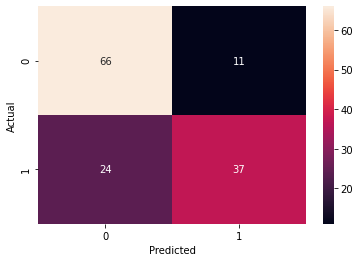

In [148]:
import seaborn as sn
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

The decision tree model had a worse result than the logistic regreesion, which we can observe from the confusion matrix.

In [227]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
dt.score(X_test,y_test)

-0.2529560810810816

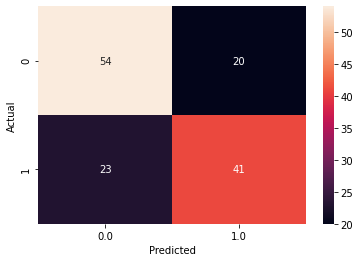

In [228]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

Support vector performed better than Decision tree but worse than logistic regression logistic regression is still better.

In [169]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(kernel='linear') 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.7536


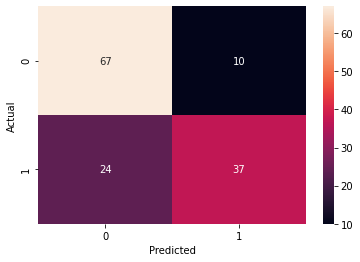

In [170]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [195]:
def experiment(X,y, N=1500, solver='lbfgs',multi='auto'):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    model = LogisticRegression(max_iter=N, solver=solver)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return confusion_matrix(y_test,y_pred)

In [208]:
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
sampler = SMOTE()
sampler.fit(X,y)
X_balanced, y_balanced = sampler.fit_resample(X,y)
Counter(y_balanced)

Counter({1: 383, 0: 383})

In [209]:
experiment(X_balanced,y_balanced)

array([[90,  9],
       [39, 54]], dtype=int64)

By using the smooth method, the y values can be correctly distributed and then logistic regression can be looked at. every time I run it, logistic regression is better